In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

import sys
sys.path.insert(0, '..')
from utils.latex import add_colname, show_latex, TABLES
from utils.config import PATHS
from utils.data_process import concat_annotated, drop_disregard, fix_week_14

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Load data

In [3]:
path = '/mnt/data/Users/A-PROOF/ellemijn/a-proof-zonmw-edit/data_process/data_process_from_inception/data/CORRECT_parse_annotations_output.pkl'

In [4]:
df_em = pd.read_pickle(path, compression = 'infer')
df_em

,index,note_tok_index,char,token,label,relation,file_nr,year,annotator,batch,NotitieID,sen_id,tok_id,tok,ATT,STM,ADM,INS,MBW,ETN,ENR,FAC,BER,ATT_lvl,STM_lvl,ADM_lvl,INS_lvl,MBW_lvl,ETN_lvl,ENR_lvl,FAC_lvl,BER_lvl,disregard,target,background,plus
0,0,1-2,2-3,),NaN,NaN,00,2022,edwin,dietetiek,0100,0100_0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1-3,4-12,valuatie,NaN,NaN,00,2022,edwin,dietetiek,0100,0100_1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1-4,13-14,/,NaN,NaN,00,2022,edwin,dietetiek,0100,0100_2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1-5,15-31,tussenresultaten,NaN,NaN,00,2022,edwin,dietetiek,0100,0100_3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1-6,32-42,progressie,NaN,NaN,00,2022,edwin,dietetiek,0100,0100_4,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11920,141,10-24,726-735,onderwijs,_,_,50,2022,edwin,dietetiek,1050,1050_6,23,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11921,142,10-25,736-737,:,_,_,50,2022,edwin,dietetiek,1050,1050_6,24,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11922,143,10-26,738-742,niet,_,_,50,2022,edwin,dietetiek,1050,1050_6,25,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11923,144,10-27,743-752,afgemaakt,_,_,50,2022,edwin,dietetiek,1050,1050_6,26,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_em.iloc[0:30:]

,index,note_tok_index,char,token,label,relation,file_nr,year,annotator,batch,NotitieID,sen_id,tok_id,tok,ATT,STM,ADM,INS,MBW,ETN,ENR,FAC,BER,ATT_lvl,STM_lvl,ADM_lvl,INS_lvl,MBW_lvl,ETN_lvl,ENR_lvl,FAC_lvl,BER_lvl,disregard,target,background,plus
0,0,1-2,2-3,),NaN,NaN,00,2022,edwin,dietetiek,0100,0100_0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1-3,4-12,valuatie,NaN,NaN,00,2022,edwin,dietetiek,0100,0100_1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1-4,13-14,/,NaN,NaN,00,2022,edwin,dietetiek,0100,0100_2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1-5,15-31,tussenresultaten,NaN,NaN,00,2022,edwin,dietetiek,0100,0100_3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1-6,32-42,progressie,NaN,NaN,00,2022,edwin,dietetiek,0100,0100_4,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1-7,43-45,op,NaN,NaN,00,2022,edwin,dietetiek,0100,0100_5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1-8,46-49,het,NaN,NaN,00,2022,edwin,dietetiek,0100,0100_5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1-9,50-58,bereiden,NaN,NaN,00,2022,edwin,dietetiek,0100,0100_5,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1-10,59-62,van,NaN,NaN,00,2022,edwin,dietetiek,0100,0100_5,8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1-11,63-70,gezonde,NaN,NaN,00,2022,edwin,dietetiek,0100,0100_5,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
list(df_em.columns)

['index',
 'note_tok_index',
 'char',
 'token',
 'label',
 'relation',
 'file_nr',
 'year',
 'annotator',
 'batch',
 'NotitieID',
 'sen_id',
 'tok_id',
 'tok',
 'ATT',
 'STM',
 'ADM',
 'INS',
 'MBW',
 'ETN',
 'ENR',
 'FAC',
 'BER',
 'ATT_lvl',
 'STM_lvl',
 'ADM_lvl',
 'INS_lvl',
 'MBW_lvl',
 'ETN_lvl',
 'ENR_lvl',
 'FAC_lvl',
 'BER_lvl',
 'disregard',
 'target',
 'background',
 'plus']

# Annotated notes

In [12]:
caption = "Ellemijn data: N of notes (incl. disregard)"
label = "em_annot_n_notes"

df_em.pivot_table(
    index='year',
    values='NotitieID',
    aggfunc='nunique',
    margins=True,
    margins_name='total',
).rename(columns={'NotitieID': 'n_notes'}
).join(
        df_em.query("disregard == True").pivot_table(
        index='file_nr',
        values='NotitieID',
        aggfunc='nunique',
        margins=True,
        margins_name='total',
    ).rename(columns={'NotitieID': 'n_disregard'})
).assign(
    n_annotated=lambda df_em: df_em.n_notes - df_em.n_disregard,
    prc_disregard=lambda df_em: (df_em.n_disregard / df_em.n_notes).mul(100).round(1),
).pipe(show_latex, caption=caption, label=label)

/home/cecilia.kuan@mydre.org/a-proof-zonmw-ellemijn/nb_data_analysis/../utils/latex.py:51: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabular = indent(df.to_latex(column_format=column_format), tab).rstrip('\n')


,n_notes,n_disregard,n_annotated,prc_disregard
year,,,,
2022,509,nan,nan,nan
total,509,0.0,509.0,0.0


# Annotated sentences

In [8]:
domains = ['ADM', 'ATT', 'BER', 'ENR', 'ETN', 'FAC', 'INS', 'MBW', 'STM']

In [13]:
# remove "disregard" notes & remove MBW annotations from week 14
#adjusted = drop_disregard(df_em).pipe(fix_week_14)

# fill NA
df_em[domains] = df_em[domains].fillna(False)

# sentence-level domain labels
domain_totals_per_sen_id = df_em.groupby(['index', 'sen_id'])[domains].any()

In [14]:
caption = "Ellemijn data: Number of sentences with domain labels (excl. disregard)"
label = "em_annot_sents_w_domain_labels"

n_sent = df_em.groupby('sen_id').sen_id.nunique()

n_sent_with_label = df_em.assign(
    has_domain = lambda df_em:df_em[domains].any(axis=1),
).query("has_domain == True").groupby('sen_id').sen_id.nunique()

table = pd.concat([
    n_sent.rename('n_all_sents'),
    n_sent_with_label.rename('n_sents_with_labels'),
], axis=1)
table.loc['total'] = table.sum()
table.assign(prc_sents_with_labels=lambda df_em:(df_em.n_sents_with_labels / df_em.n_all_sents).mul(100).round(1)
).pipe(show_latex, caption=caption, label=label)

/home/cecilia.kuan@mydre.org/a-proof-zonmw-ellemijn/nb_data_analysis/../utils/latex.py:51: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabular = indent(df.to_latex(column_format=column_format), tab).rstrip('\n')


,n_all_sents,n_sents_with_labels,prc_sents_with_labels
sen_id,,,
0100_0,1.0,nan,nan
0100_1,1.0,nan,nan
0100_2,1.0,nan,nan
0100_3,1.0,nan,nan
0100_4,1.0,nan,nan
...,...,...,...
1050_3,1.0,nan,nan
1050_4,1.0,1.0,100.0
1050_5,1.0,nan,nan


# Distribution of domains

In [15]:
caption = "Ellemijn data: Distribution of domains"
label = "em_annot_domains"

n_labels = domain_totals_per_sen_id.pivot_table(
    index='year',
    values=domains,
    aggfunc='sum',
    margins=True,
    margins_name='total',
).assign(total=lambda df_em: df_em.sum(axis=1))

p_labels = (n_labels.div(n_labels.iloc[:, -1], axis=0) * 100).round()
26
piv = n_labels.pipe(add_colname, 'n').join(
    p_labels.pipe(add_colname, '%')
).astype('Int64'
).sort_index(axis=1, level=[0,1], ascending=[True, False])

piv.pipe(show_latex, caption=caption, label=label)

KeyError: 'year'

NameError: name 'piv' is not defined

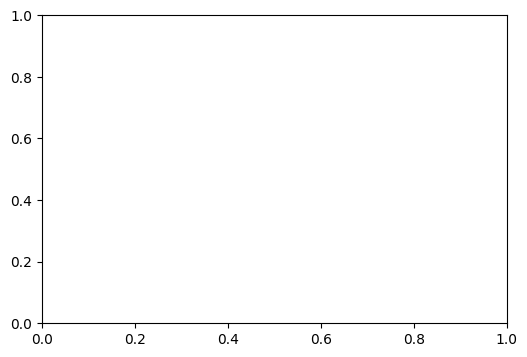

In [27]:
# total number of labels

fig, ax = plt.subplots(figsize=(6, 4))
piv.loc[['total']].xs('n', axis=1, level=1).iloc[:,:-1].T.plot.bar(
    ax=ax,
    legend=False, 
    grid=True, 
    title='Weeks 14-34: Total number of domain labels',
)
#fig.savefig('figures/w14-w34_total_n_domains.png')

# Distribution of levels per domain

In [17]:
caption = "Weeks 14-34: Distribution of levels per domain"
label = "w14-w34_annot_levels"

stats = []
for lvl in [f"{i}_lvl" for i in domains]:
    notna = df_em.loc[df_em[lvl].notna()]
    stat = notna.groupby(['year', 'sen_id'])[lvl].apply(lambda s: {i for i in s if i==i})
    stat = stat.explode().groupby(level=0).value_counts()
    stats.append(stat)
table = pd.concat(stats, axis=1)
table = table.append(pd.concat([table.groupby(level=1).sum()], keys=['total']))
table.index = pd.MultiIndex.from_tuples([(i,int(j)) for i,j in table.index])
# sums = table.groupby(level=0).sum()
# sums.index = pd.MultiIndex.from_tuples([(i, 'total') for i in sums.index])
# table = pd.concat([table, sums]).sort_index(level=0)
table.pipe(show_latex, caption=caption, label=label)

/tmp/ipykernel_2325/3698628379.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(pd.concat([table.groupby(level=1).sum()], keys=['total']))
/home/cecilia.kuan@mydre.org/a-proof-zonmw-ellemijn/nb_data_analysis/../utils/latex.py:51: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabular = indent(df.to_latex(column_format=column_format), tab).rstrip('\n')


ADM_lvl ATT_lvl BER_lvl ENR_lvl ETN_lvl FAC_lvl INS_lvl MBW_lvl  \
2022  2     2.0     1.0     2.0    25.0     8.0     nan    11.0     9.0   
      4     nan     nan     8.0     nan     nan     4.0     2.0     4.0   
      0     nan     nan     3.0     nan     1.0     nan     nan     1.0   
      1     nan     nan     2.0     5.0     nan     nan     2.0     8.0   
      3     nan     nan     1.0     7.0    15.0     nan     1.0     2.0   
      5     nan     nan     nan     nan     nan     3.0     nan     nan   
total 0     0.0     0.0     3.0     0.0     1.0     0.0     0.0     1.0   
      1     0.0     0.0     2.0     5.0     0.0     0.0     2.0     8.0   
      2     2.0     1.0     2.0    25.0     8.0     0.0    11.0     9.0   
      3     0.0     0.0     1.0     7.0    15.0     0.0     1.0     2.0   
      4     0.0     0.0     8.0     0.0     0.0     4.0     2.0     4.0   
      5     0.0     0.0     0.0     0.0     0.0     3.0     0.0     0.0   

        STM_lvl  
2022  2     4.0  
      4     nan  
      0     nan  
      1     nan  
      3     nan  
      5     nan  
total 0     0.0  
      1     0.0  
      2     4.0  
      3     0.0  
      4     0.0  
      5     0.0

In [ ]:
cols = table.index.levels[0]
rows = table.columns[:5]
nrows = len(rows)
ncols = len(cols)
fig, axes = plt.subplots(nrows, ncols, figsize=(2*ncols,2*nrows), constrained_layout=True)

for i, row in enumerate(rows):
    for j, col in enumerate(cols):
        ylabel = row if j == 0 else ''
        table.xs(col)[row].plot.pie(ax=axes[i,j])
        axes[i,j].set_ylabel(ylabel=ylabel, labelpad=16)
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

#fig.savefig('figures/w14-w34_levels_part1.png')

In [ ]:
cols = table.index.levels[0]
rows = table.columns[5:]
nrows = len(rows)
ncols = len(cols)
fig, axes = plt.subplots(nrows, ncols, figsize=(2*ncols,2*nrows), constrained_layout=True)

for i, row in enumerate(rows):
    for j, col in enumerate(cols):
        ylabel = row if j == 0 else ''
        table.xs(col)[row].plot.pie(ax=axes[i,j])
        axes[i,j].set_ylabel(ylabel=ylabel, labelpad=16)
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

#fig.savefig('figures/w14-w34_levels_part2.png')

# Levels aggregated on a note-level

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8), constrained_layout=True)
for i, lev in enumerate([f'{d}_lvl' for d in domains]):
    x, y = i%3, i//3
    s = adjusted.groupby('NotitieID')[lev].nunique().loc[lambda s: s>0]
    s.value_counts().plot.bar(ax=axes[x,y], grid=True)
    axes[x,y].set_title(lev)

#fig.savefig('figures/w14-w34_dist_nunique_levels_per_note.png')

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8), constrained_layout=True)
for i, lev in enumerate([f'{d}_lvl' for d in domains]):
    x, y = i%3, i//3
    to_agg = ['nunique', 'min', 'max']
    sel_rows = lambda df: df['nunique'] > 1
    s = adjusted.groupby('NotitieID')[lev].agg(to_agg).loc[sel_rows]
    diff = (s['max'] - s['min']).astype(int)
    diff.value_counts().sort_index().plot.bar(ax=axes[x,y], grid=True)
    axes[x,y].set_title(lev)

#fig.savefig('figures/w14-w34_dist_diff_minmax_levels_per_note.png')

# Randomly-selected notes vs. Keyword-selected notes

In [ ]:
# % disregard notes (out of all notes)
compare_samp = df.assign(
    samp_meth=lambda df: df.samp_meth.str.split('_').str[0]
).groupby(['samp_meth']).apply(
    lambda grp: grp.groupby('NotitieID').disregard_note.first().agg({'n':'size', 'p':'sum'})
)
pct_disregard = (compare_samp.p / compare_samp.n).mul(100).round(1).rename(r'% disregard notes')

# % sentences with labels (out of all sents, excl. disregard)
adjusted = adjusted.assign(
    samp_meth=lambda df: df.samp_meth.str.split('_').str[0]
)
n_sents = adjusted.groupby('samp_meth').sen_id.nunique()

n_sents_with_label = adjusted.assign(
    has_domain = lambda df: df[domains].any(axis=1),
).query("has_domain == True").groupby('samp_meth').sen_id.nunique()

pct_sents_with_label = (n_sents_with_label / n_sents).mul(100).round(1).rename(r'% sentences with labels')

# distribution of domains
rows_with_domain = adjusted.loc[adjusted[domains].any(axis=1)]
domain_totals_per_sen_id = rows_with_domain.groupby(['samp_meth', 'sen_id'])[domains].any()

n_labels = domain_totals_per_sen_id.pivot_table(
    index='samp_meth',
    values=domains,
    aggfunc='sum',
).assign(total=lambda df: df.sum(axis=1))

pct_labels = (n_labels.div(n_labels.iloc[:, -1], axis=0) * 100).round(1).iloc[:,:-1]

# put everything together
caption = "Weeks 14-34: Comparison between randomly-selected and keyword-selected notes"
label = "w14-w34_annot_kwd_vs_rndm"

pd.concat([pct_disregard, pct_sents_with_label, pct_labels], axis=1).T.pipe(show_latex, caption=caption, label=label)

In [ ]:
# prefix = 'w14-w34_annot'
# for idx, table in enumerate(TABLES):
#     with open(f'./tables/{prefix}_{idx}.tex', 'w', encoding='utf8') as f:
#         f.write(table)